# 집값

In [255]:
!pip show plotnine

Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: /opt/conda/lib/python3.7/site-packages
Requires: patsy, pandas, matplotlib, scipy, mizani, statsmodels, descartes, numpy
Required-by: 


In [256]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: /opt/conda/lib/python3.7/site-packages
Requires: seaborn, scipy, matplotlib, numpy
Required-by: 


In [257]:
## 오류를 무시하게 한다
import warnings
warnings.filterwarnings('ignore')

In [258]:
import pandas as pd
import numpy as np
import re 
%matplotlib inline

In [259]:
from plotnine import * 

In [260]:
# 현재 위치 정보를 확인 
%pwd
%ls data/

Busan_cctv.csv            survey_person.csv
Busan_cctv_allinfo.csv    survey_site.csv
Busan_pop.csv             survey_survey.csv
Report.xls                survey_visited.csv
banklist.csv              tesla_stock_quandl.csv
billboard.csv             weather.csv
cine.csv                  부산광역시_강서구_CCTV.csv
concat_1.csv              부산광역시_금정구_CCTV.csv
concat_2.csv              부산광역시_기장군_CCTV.csv
concat_3.csv              부산광역시_남구_CCTV.csv
country_timeseries.csv    부산광역시_동구_CCTV.csv
data.zip*                 부산광역시_동래구_CCTV.csv
data_result.csv           부산광역시_부산진구_CCTV.csv
fhv_tripdata_2015-01.csv  부산광역시_북구_CCTV.csv
fhv_tripdata_2015-02.csv  부산광역시_사상구_CCTV.csv
fhv_tripdata_2015-03.csv  부산광역시_사하구_CCTV.csv
fhv_tripdata_2015-04.csv  부산광역시_서구_CCTV.csv
fhv_tripdata_2015-05.csv  부산광역시_수영구_CCTV.csv
gangseo.csv               부산광역시_연제구_CCTV.csv
gapminder.tsv             부산광역시_영도구_CCTV.csv
pew.csv                   부산광역시_중구_CCTV.csv
raw_data_urls.txt         부산광역시_해운대구_CCTV.csv
scientists.csv       

In [261]:
pre_sale = pd.read_csv('./data/전국_평균_분양가격_2018.6월_.csv', 
                      encoding = 'euc-kr',engine='python')
pre_sale.shape
pre_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [262]:
pre_sale.info()
## 분양가격이 데이터가 없는 경우가 있어서 object라고 뜸 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null int64
월          2805 non-null int64
분양가격(㎡)    2674 non-null object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [263]:
pre_sale.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2800,False,False,False,False,False
2801,False,False,False,False,False
2802,False,False,False,False,False
2803,False,False,False,False,True


In [273]:
# 빈값이 있는지  확인 
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [274]:
## 글씨체 설정
import matplotlib as plt
plt.rc('font', family = 'NanumGothic')

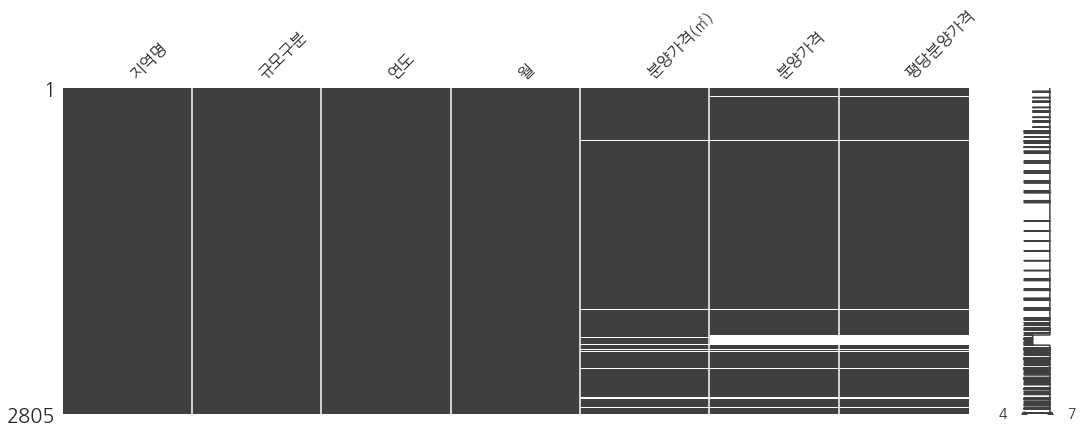

In [275]:
## 없는 값들 보여준다. 
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [276]:
## 연도와 월을 카테고리로 사용하기 위해 타입을 바꿔준다. 
pre_sale['연도'] =  pre_sale['연도'].astype(str)
pre_sale['월'] =  pre_sale['월'].astype(str)

In [277]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [278]:
## 분양가격의 타입을 숫자로 변경해준다. 
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors = 'coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
지역명        2805 non-null object
규모구분       2805 non-null object
연도         2805 non-null object
월          2805 non-null object
분양가격(㎡)    2674 non-null object
분양가격       2582 non-null float64
평당분양가격     2582 non-null float64
dtypes: float64(2), object(5)
memory usage: 153.5+ KB


In [279]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
분양가격       223
평당분양가격     223
dtype: int64

In [280]:
## 숫자를 설명 
## 데이터가 몇개이고 평균이 뭐고 편차가 뭔지 
pre_sale.describe()

,분양가격,평당분양가격
count,"2,582","2,582"
mean,"3,057","10,087"
std,"1,110","3,663"
min,"1,868","6,164"
25%,"2,339","7,719"
50%,"2,738","9,037"
75%,"3,289","10,854"
max,"8,098","26,723"


In [281]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2805,2805,2805,2805,2674
unique,17,5,4,12,1278
top,대전,전체,2017,3,2221
freq,165,561,1020,255,17


In [282]:
## 특정년도만 출력 
pre_sale_2017 = pre_sale[pre_sale['연도'] =='2017']
pre_sale_2017.shape

(1020, 7)

In [283]:
################################
######## 각 지역명 갯수 ########
################################
pre_sale['지역명'].value_counts()

대전    165
제주    165
서울    165
세종    165
경북    165
경기    165
충남    165
대구    165
부산    165
광주    165
전북    165
경남    165
전남    165
인천    165
강원    165
울산    165
충북    165
Name: 지역명, dtype: int64

# 전국 평균 분양 가격 

In [284]:
## groupby의 도움말 보기 
pre_sale.groupby?

Signature:
pre_sale.groupby(
    by=None,
    axis=0,
    level=None,
    as_index=True,
    sort=True,
    group_keys=True,
    squeeze=False,
    observed=False,
    **kwargs,
)
Docstring:
Group DataFrame or Series using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A label or list of
    labels may be passed to group by the columns in ``self``. Noti

In [285]:
pd.options.display.float_format = '{:,.0f}'.format
##.T 는 행 과 열을 바꾼다.
#pre_sale.groupby(pre_sale.연도).describe().T
pre_sale.groupby(pre_sale.연도).head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"
255,서울,전체,2016,1,6108,"6,108","20,156"
256,서울,전용면적 60㎡이하,2016,1,6427,"6,427","21,209"
257,서울,전용면적 60㎡초과 85㎡이하,2016,1,6036,"6,036","19,919"
258,서울,전용면적 85㎡초과 102㎡이하,2016,1,6513,"6,513","21,493"
259,서울,전용면적 102㎡초과,2016,1,6551,"6,551","21,618"


In [286]:
pre_sale.pivot_table('평당분양가격','규모구분','연도')


연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,260"
전용면적 60㎡이하,"8,952","9,399","10,246","10,957"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,438"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,457"
전체,"8,893","9,293","9,901","10,560"


In [287]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"


# 전국 분양가 변동 금액

In [288]:
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,643"
1,경기,"10,377","11,220","11,850","12,854"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,262"
4,광주,"8,052","8,899","9,464","9,630"
5,대구,"9,232","10,310","11,456","11,652"
6,대전,"8,098","8,502","9,045","9,589"
7,부산,"10,307","10,430","11,578","12,710"
8,서울,"19,725","20,663","21,376","22,299"
9,세종,"8,750","8,860","9,135","10,382"


In [289]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) * 1000
min_delta_price = np.min(region_year['변동액']) * 1000
mean_delta_price = np.mean(region_year['변동액']) * 1000

print(f'{max_delta_price:,.0f}')
print(f'{min_delta_price:,.0f}')
print(f'{mean_delta_price:,.0f}')
region_year

5,335,000
387,000
1,666,647


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,643",482
1,경기,"10,377","11,220","11,850","12,854",2476
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,262",1090
4,광주,"8,052","8,899","9,464","9,630",1577
5,대구,"9,232","10,310","11,456","11,652",2419
6,대전,"8,098","8,502","9,045","9,589",1490
7,부산,"10,307","10,430","11,578","12,710",2402
8,서울,"19,725","20,663","21,376","22,299",2574
9,세종,"8,750","8,860","9,135","10,382",1631


# 시각화 레츠 기릿

In [290]:
import seaborn as sns
sns.set_style("whitegrid")

In [291]:
import matplotlib.pyplot as plt 
plt.rc('font',family = 'NanumGothic')

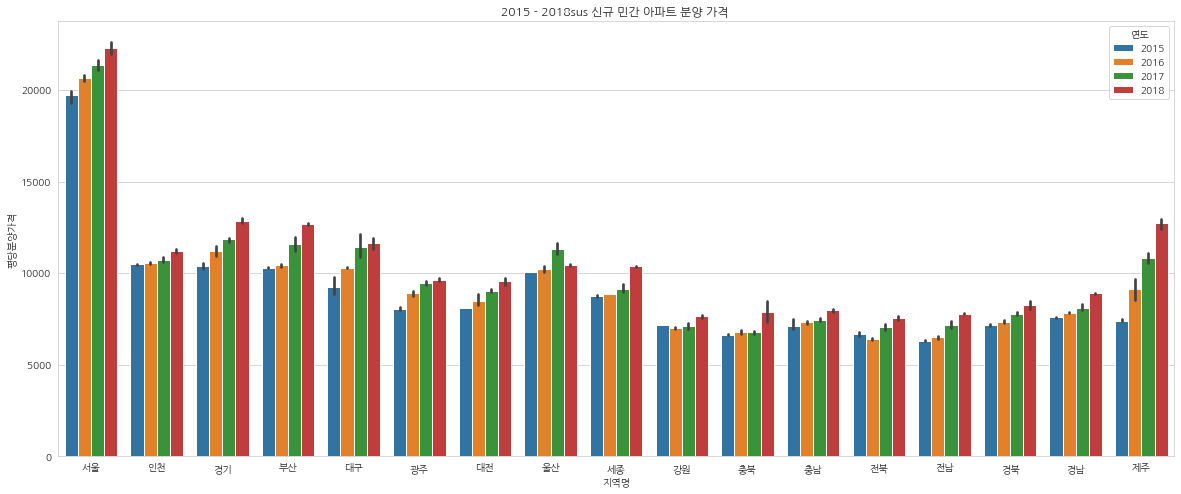

In [292]:
plt.figure(figsize = (20,8))
plt.title("2015 - 2018sus 신규 민간 아파트 분양 가격 ")
sns.barplot(data=region_year_all, x='지역명' , y='평당분양가격', hue = '연도')

In [293]:
df_year_region = pd.pivot_table(region_year_all, index='지역명',columns='연도',values='평당분양가격')
df_year_region.head()

연도,2015,2016,2017,2018
지역명,,,,
강원,"7,160","7,011","7,127","7,643"
경기,"10,377","11,220","11,850","12,854"
경남,"7,586","7,848","8,120","8,894"
경북,"7,171","7,361","7,795","8,262"
광주,"8,052","8,899","9,464","9,630"


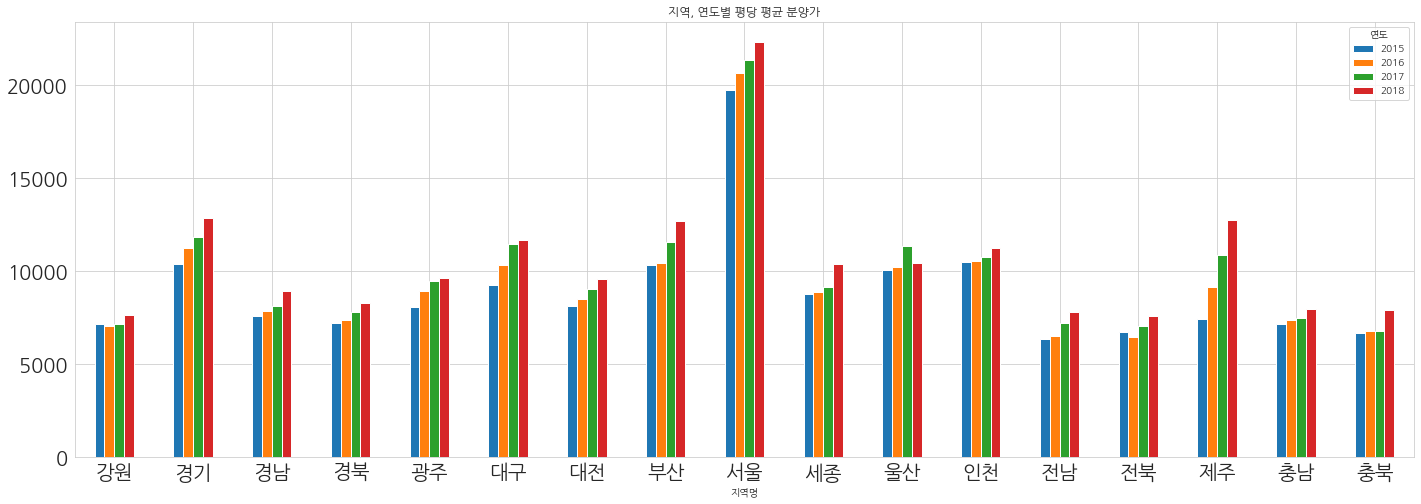

In [294]:
df_year_region.plot.bar(figsize = (24,8), grid= True, fontsize=20, rot=0, title="지역, 연도별 평당 평균 분양가")

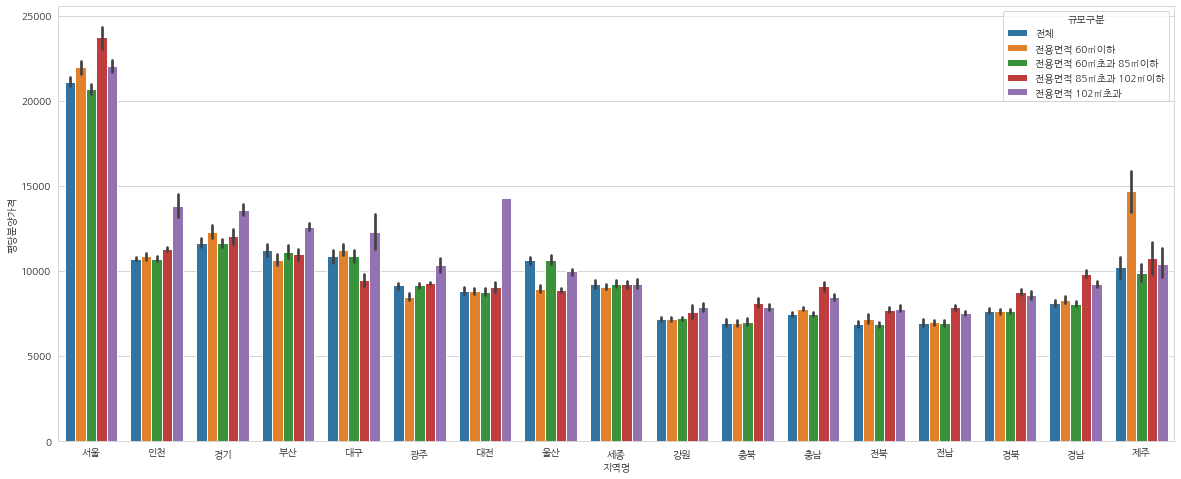

In [295]:
plt.figure(figsize=(20,8))
sns.barplot(data=pre_sale,x = '지역명', y='평당분양가격',hue='규모구분')

In [296]:
pre_sale_size = pre_sale.pivot_table(values='평당분양가격', index='지역명',columns='규모구분')

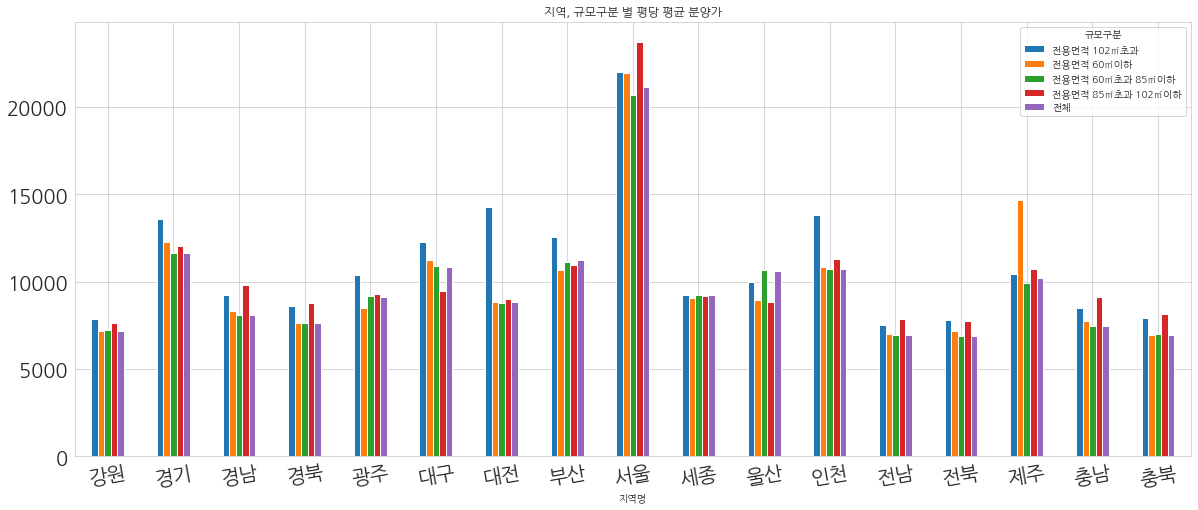

In [297]:
# rot은 로테이션하고 글자 기울기 조절 
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가',figsize=(20,8),grid=True, fontsize=20,rot=10)

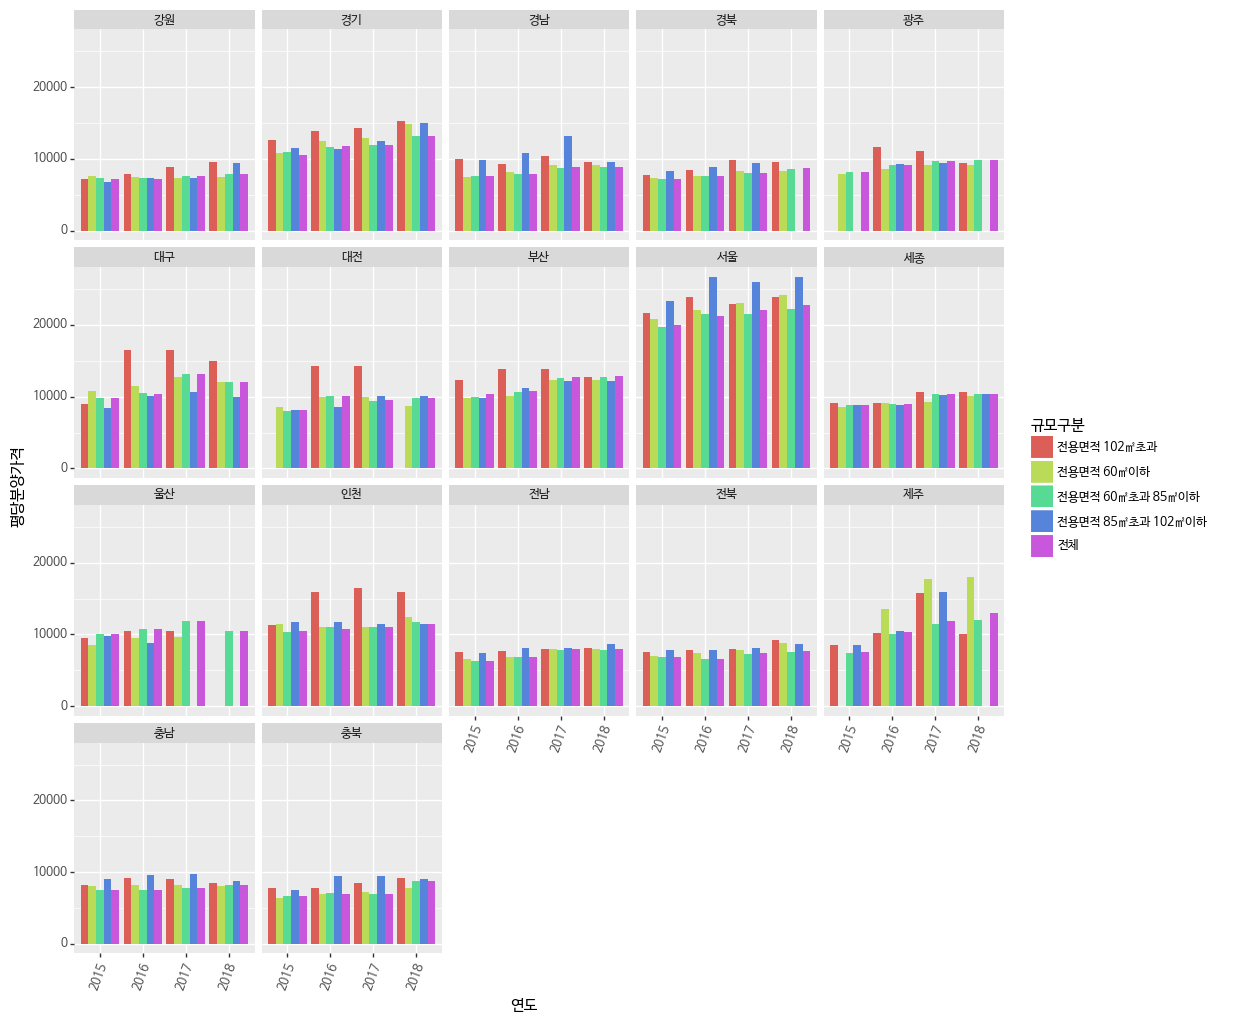

<ggplot: (8729189498949)>

In [298]:
#위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

In [299]:
pre_sale[(pre_sale["지역명"] == '대전') & (pre_sale['규모구분'] == '전용면적 102㎡초과')]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,nan,nan
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
204,대전,전용면적 102㎡초과,2015,12,,nan,nan
289,대전,전용면적 102㎡초과,2016,1,,nan,nan
374,대전,전용면적 102㎡초과,2016,2,NaN,nan,nan
459,대전,전용면적 102㎡초과,2016,3,NaN,nan,nan
544,대전,전용면적 102㎡초과,2016,4,NaN,nan,nan
629,대전,전용면적 102㎡초과,2016,5,NaN,nan,nan
714,대전,전용면적 102㎡초과,2016,6,NaN,nan,nan
799,대전,전용면적 102㎡초과,2016,7,NaN,nan,nan


In [300]:
pre_sale[["지역명","평당분양가격","규모구분"]]

,지역명,평당분양가격,규모구분
0,서울,"19,275",전체
1,서울,"18,652",전용면적 60㎡이하
2,서울,"19,411",전용면적 60㎡초과 85㎡이하
3,서울,"18,879",전용면적 85㎡초과 102㎡이하
4,서울,"19,401",전용면적 102㎡초과
...,...,...,...
2800,제주,"12,952",전체
2801,제주,"18,025",전용면적 60㎡이하
2802,제주,"12,009",전용면적 60㎡초과 85㎡이하
2803,제주,nan,전용면적 85㎡초과 102㎡이하


In [301]:
pre_sale['평당분양가격'].dropna(inplace= True, axis =0)

In [304]:
pre_sale['평당분양가격'].isnull().sum()

0

In [305]:
# pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)
pre_sale[pre_sale['평당분양가격'] ==0]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

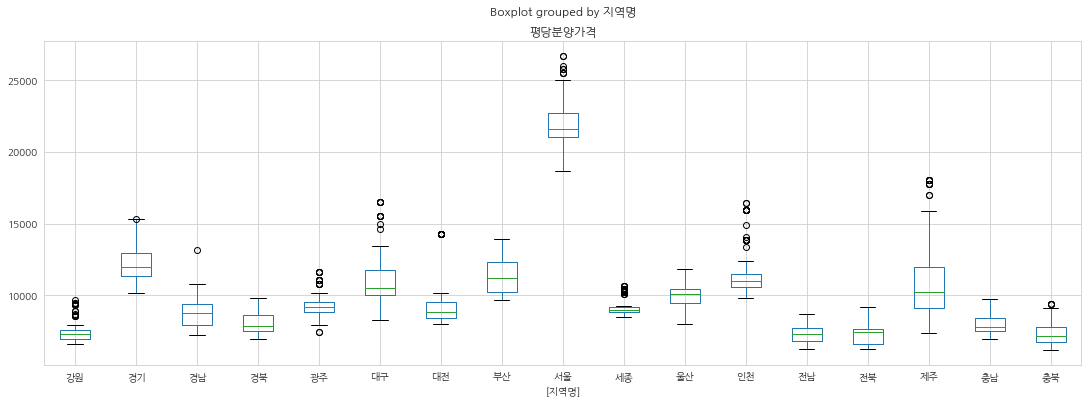

In [306]:
## 박스 플롯으로 작성
pre_sale[['지역명','평당분양가격']].boxplot(by=['지역명'],figsize=(18,6))

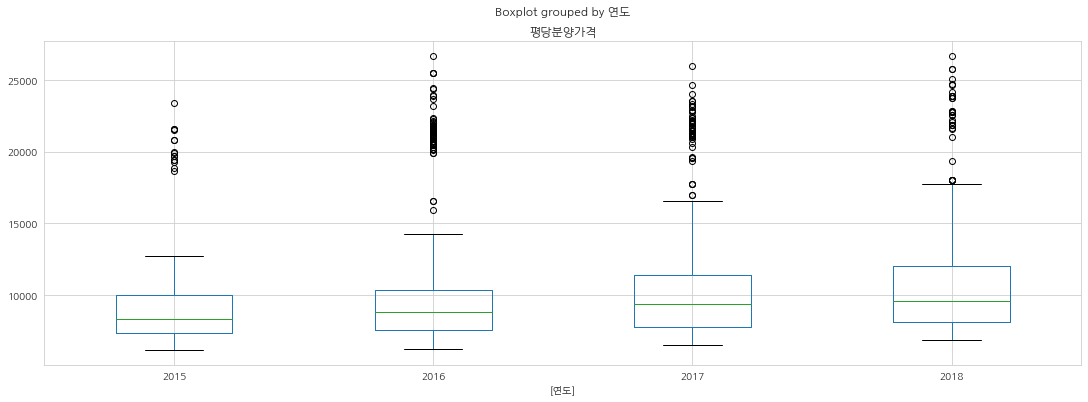

In [307]:
pre_sale[['연도','지역명','평당분양가격']].boxplot(by=['연도'],figsize=(18,6))

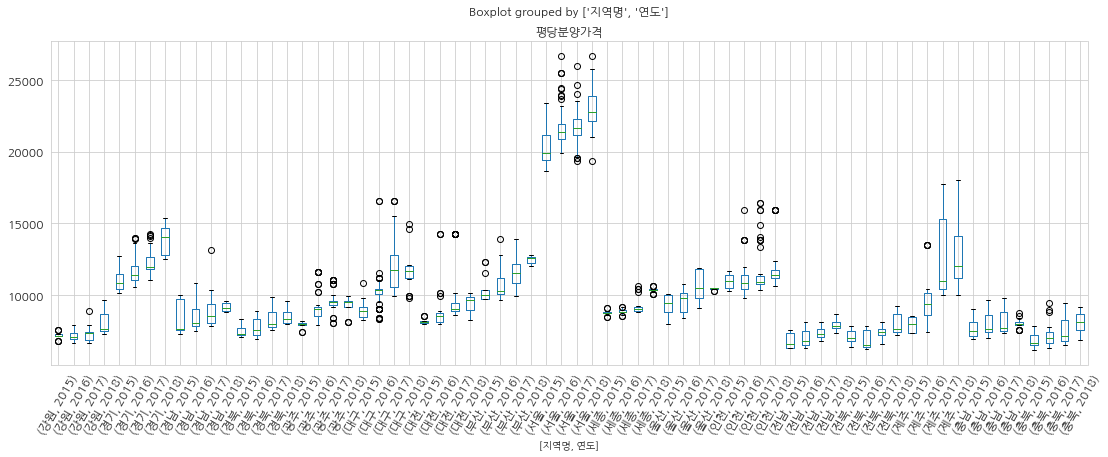

In [308]:
pre_sale[['연도','지역명','평당분양가격']].boxplot(by=['지역명','연도'] , figsize=(18,6),fontsize=12,rot=60)

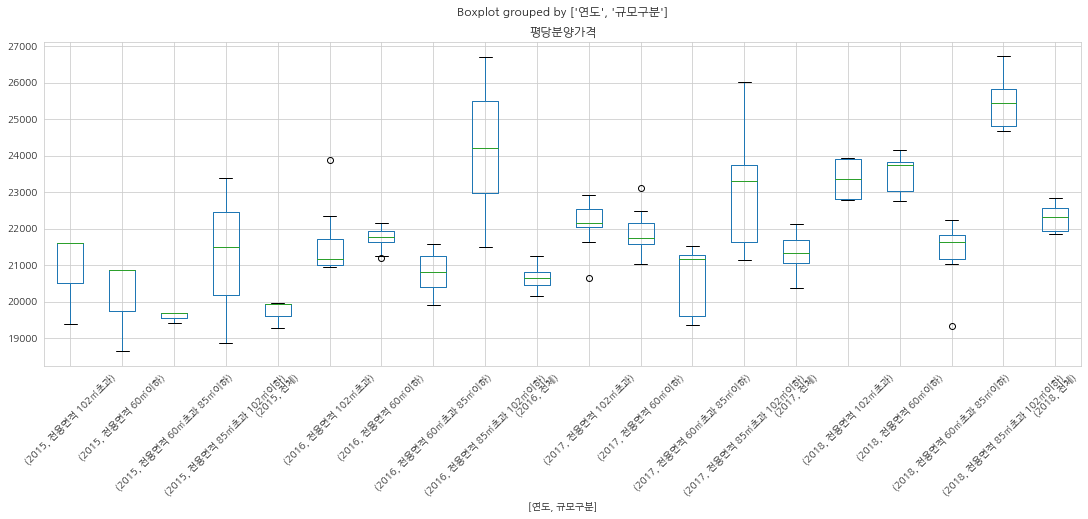

In [309]:
pre_sale_seoul= pre_sale[pre_sale['지역명'] =='서울']
pre_sale_seoul[['연도','규모구분','평당분양가격']].boxplot(by=['연도','규모구분'],figsize=(18,6),rot=45)

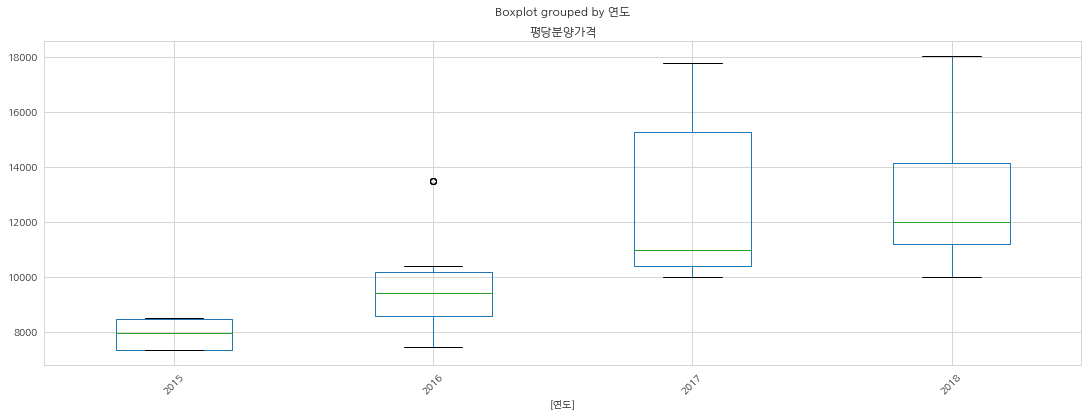

In [310]:
pre_sale_jeju= pre_sale[pre_sale['지역명'] =='제주']
pre_sale_jeju[['연도','평당분양가격']].boxplot(by=['연도'],figsize=(18,6),rot=45)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 80 to 2804
Data columns (total 7 columns):
지역명        165 non-null object
규모구분       165 non-null object
연도         165 non-null object
월          165 non-null object
분양가격(㎡)    148 non-null object
분양가격       141 non-null float64
평당분양가격     141 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.3+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c0436b10>,
      dtype=object)

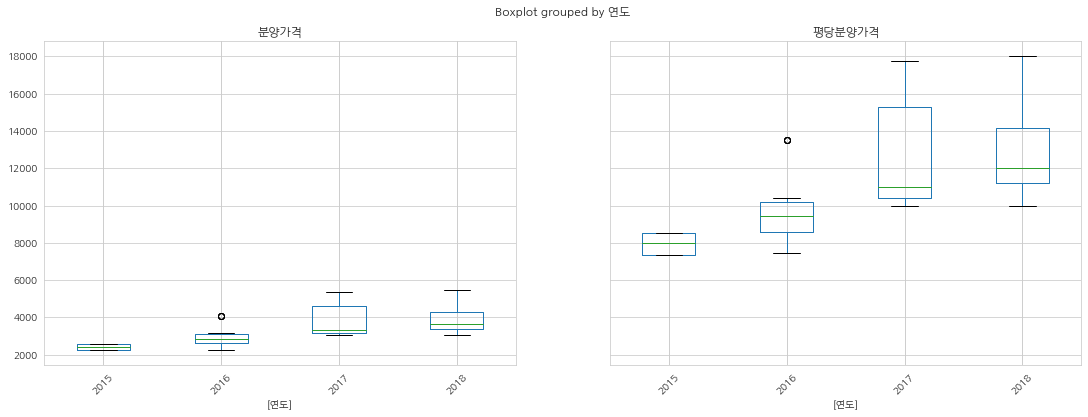

In [311]:
pre_sale_jeju.info()
pre_sale_jeju[['연도','분양가격','평당분양가격']].boxplot(by=['연도'],figsize=(18,6),rot=45)

# 평당 분양가격 레츠기리이잇

In [312]:
import numpy as np
df = pd.read_csv('data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', encoding='euc-kr',skiprows =1, header =0,engine ='python')
df.shape

(23, 27)

In [313]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [314]:
year = df.iloc[0]
month = df.iloc[1]
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [315]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i>2 and i<15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i>=15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i ==2:
        year[i] = ' '.join([year[i], month[i]])
    elif i ==1:
        year[i] = '시군구'
        

print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [316]:
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [317]:
df.columns = year
df


,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [318]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [319]:
pre_sale.columns 

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [320]:
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

df['지역'] = df['구분'] + df['시군구']

In [321]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [322]:
df_2013_2015 = pd.melt(df, id_vars=['지역'],
                      value_vars = ['2013년 12월','2014년 1월','2014년 2월','2014년 3월','2014년 4월','2014년 5월','2014년 6월', '2014년 7월', 
                                   '2014년 8월','2014년 9월','2014년 10월','2014년 11월','2014년 12월','2015년 1월','2015년 2월','2015년 3월','2015년 4월','2015년 5월',
                                   '2015년 6월','2015년 7월','2015년 8월','2015년 9월',])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [323]:
df_2013_2015.columns= ['지역','기간','분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [324]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])

df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월','',year_month.split('년')[1]).strip())

In [325]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [326]:
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산','부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원','강원')

df_2013_2015['지역'].value_counts()

       44
세종     22
전북     22
강원     22
서울     22
대구     22
제주     22
경기     22
전국     22
수도권    22
경북     22
대전     22
경남     22
충남     22
울산     22
충북     22
광주     22
전남     22
인천     22
부산     22
Name: 지역, dtype: int64

In [327]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 2월,"8,067",2014,12
freq,44,21,7,252,42


In [328]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.2+ KB


In [329]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',','').astype(int)

In [330]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
지역      462 non-null object
기간      462 non-null object
분양가     462 non-null object
연도      462 non-null object
월       462 non-null object
분양가격    462 non-null int64
dtypes: int64(1), object(5)
memory usage: 21.8+ KB


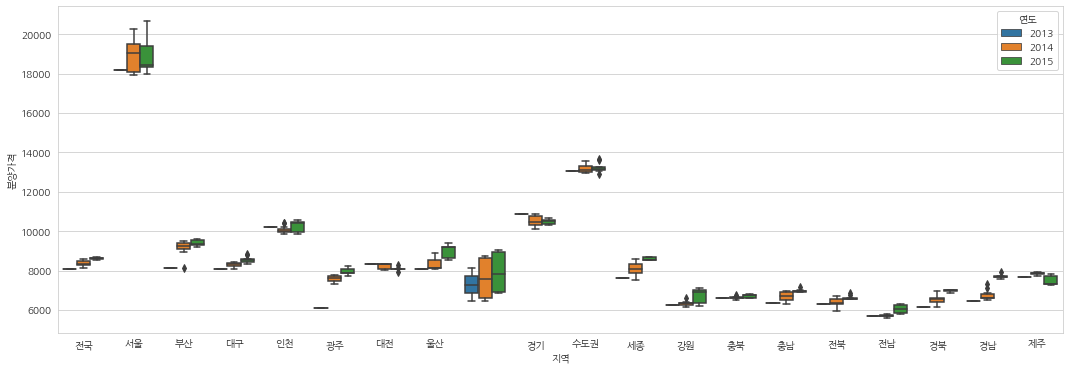

In [331]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df_2013_2015, x='지역',y='분양가격',hue='연도')

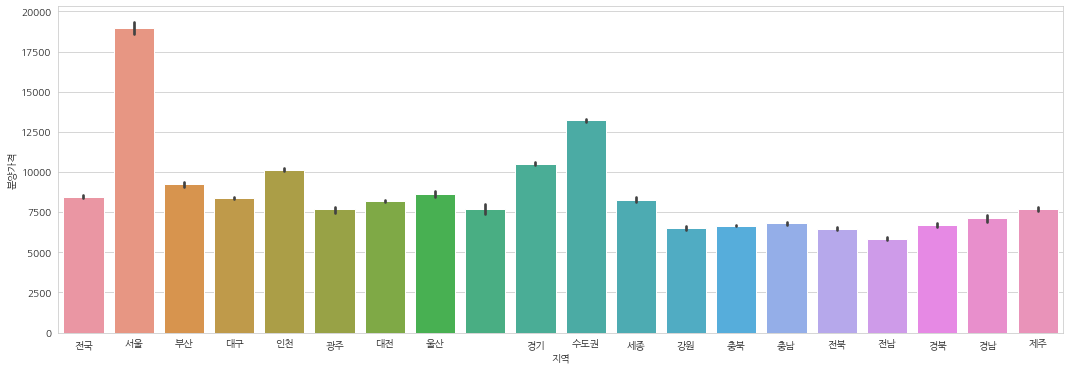

In [332]:
plt.figure(figsize=(18,6))
sns.barplot(data=df_2013_2015, x='지역',y='분양가격')

# 2013년부터 2018년 7월까지 데이터를 합치자 

In [333]:
df_2013_2015 = pre_sale.loc[pre_sale['규모구분'] =='전체']

df_2013_2015.shape
df_2013_2015.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [334]:
df_2013_2015_prepare = df_2013_2015[['지역명','연도','월','평당분양가격']]
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [335]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [336]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [337]:
df_2015_2018_prepare = df_2015_2018[['지역명','연도','월','평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [353]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])

In [354]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [355]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2780,전북,2018,6,"7,676"
2785,전남,2018,6,"7,775"
2790,경북,2018,6,"8,682"
2795,경남,2018,6,"8,894"
2800,제주,2018,6,"12,952"


In [344]:
##########################################################
##################서로 오차가 있어야 하는데 없음 확인 요망 

In [345]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [346]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [347]:
exclude_region = [region for region in df_2013_2015_region 
                 if not region in df_2015_2018_region]
exclude_region

[]

In [349]:
## df_2013_2018.drop 확인 해봐야 한다.

df_2013_2018.loc[df_2013_2018['지역명'].str.match('')]

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"
...,...,...,...,...
2780,전북,2018,6,"7,676"
2785,전남,2018,6,"7,775"
2790,경북,2018,6,"8,682"
2795,경남,2018,6,"8,894"


In [357]:
df_year_mean = df_2013_2018.groupby(['연도'])['평당분양가격'].mean()
df_year_mean

연도
2015    8,893
2016    9,293
2017    9,901
2018   10,560
2015    8,893
2016    9,293
2017    9,901
2018   10,560
Name: 평당분양가격, dtype: float64

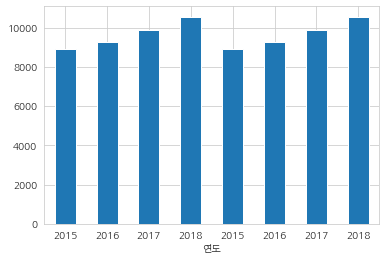

In [358]:
df_year_mean.plot.bar(rot=0)

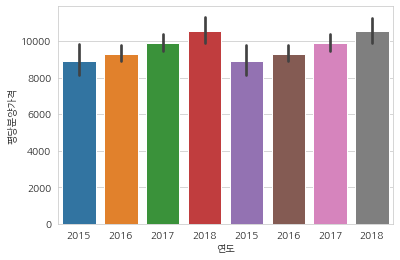

In [352]:
sns.barplot(data=df_2013_2018, x='연도', y='평당분양가격')

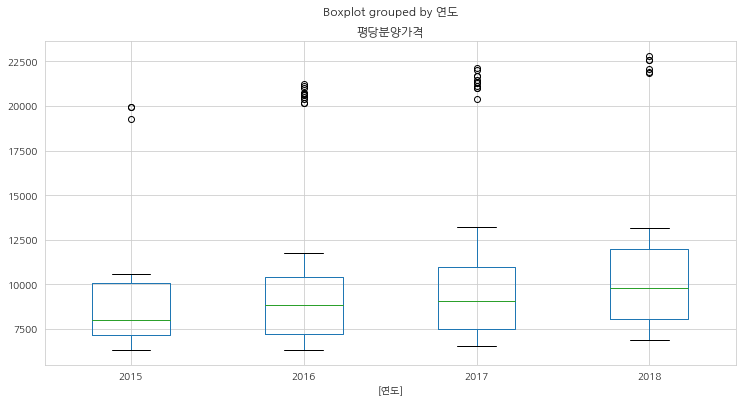

In [359]:
df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))